<center><img src="https://news.illinois.edu/files/6367/543635/116641.jpg" alt="University of Illinois" width="250"/></center>

# Machine Learning in Finance Lab

## Final Group Project ##


* Yu-Ching Liao <ycliao3@illinois.edu>
* Saranpat Praserrtthum <sp73@illinois.edu>
* Hyoung Woo Hahm

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import seaborn as sns
import pylab
import scipy.stats as stats
import warnings
import sklearn as sk
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.multiclass import OneVsRestClassifier, OneVsOneClassifier
from sklearn.linear_model import LogisticRegression



warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv(
    'MLF_GP1_CreditScore.csv'
)
df.head()

,Sales/Revenues,Gross Margin,EBITDA,EBITDA Margin,Net Income Before Extras,Total Debt,Net Debt,LT Debt,ST Debt,Cash,...,Interest Coverage,Total Liquidity,Current Liquidity,Current Liabilities,EPS Before Extras,PE,ROA,ROE,InvGrd,Rating
0,-0.005496,0.030763,0.018885,0.024515,0.146849,-0.029710,-0.019296,-0.042648,0.049875,-0.133716,...,0.136748,0.392143,-0.184887,0.062781,0.148305,0.100409,0.163266,0.102521,1,A1
1,-0.005496,0.030763,0.088716,0.094733,0.146849,-0.029710,-0.019296,-0.042648,0.049875,-0.133716,...,0.214657,0.392143,-0.184887,0.062781,0.148305,-0.089598,0.163266,0.102521,1,A1
2,-0.007045,0.023159,0.088716,0.096440,0.108590,0.039410,0.034268,0.009059,0.250371,0.101315,...,0.205290,0.483257,-0.017877,0.121357,0.110656,-0.045142,0.105711,0.103378,1,A1
3,-0.009396,0.028400,0.088716,0.099046,0.146137,0.030071,0.036938,-0.016964,0.356994,-0.052606,...,0.232991,0.996955,-0.122017,0.079051,0.151639,-0.008231,0.162421,0.132295,1,A1
4,-0.009009,0.027714,0.088716,0.098611,0.123500,0.024224,0.034445,-0.034132,0.461894,-0.090869,...,0.172906,1.711426,-0.161561,0.084319,0.130435,0.015528,0.156427,0.225144,1,A1


## 1) Introduction/Exploratory Data Analysis,
Scatter Matrix

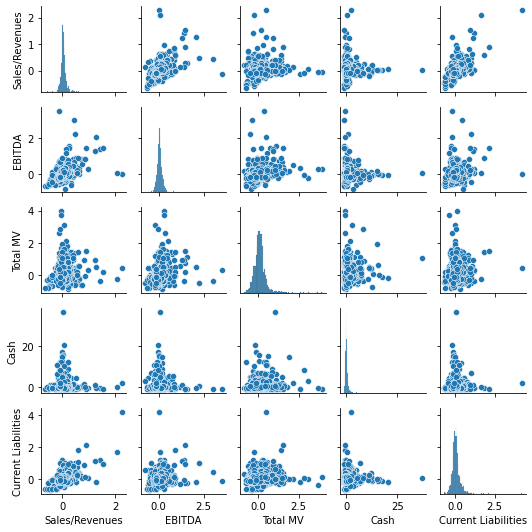

In [3]:
cols = ['Sales/Revenues', "EBITDA", "Total MV", "Cash", 'Current Liabilities']
sns.pairplot(df[cols], size = 1.5)
plt.tight_layout()
plt.show()

Print the Shape Out

In [4]:
labels = list(df.columns)
n_column = len(labels)
n_row = len(df)

print("The number of Columns is", str(n_column)+".")
print("The number of Rows is", str(n_row)+".")

The number of Columns is 28.
The number of Rows is 1700.


Print the nature out

In [5]:
nl = []
sl = []
ol = []

for label in labels:
    Number = 0
    String = 0
    Other = 0

    for i in df[label]:
        if type(i) == str:
            String += 1
        elif (type(i) == int) or (type(i) == float):
            Number += 1
        else:
            Other += 1
    nl.append(Number)
    sl.append(String)
    ol.append(Other)

Output = {
    "Label": labels,
    "Number": nl,
    "String": sl,
    "Other": ol
}
Output = pd.DataFrame(Output)
Output

,Label,Number,String,Other
0,Sales/Revenues,1700,0,0
1,Gross Margin,1700,0,0
2,EBITDA,1700,0,0
3,EBITDA Margin,1700,0,0
4,Net Income Before Extras,1700,0,0
5,Total Debt,1700,0,0
6,Net Debt,1700,0,0
7,LT Debt,1700,0,0
8,ST Debt,1700,0,0
9,Cash,1700,0,0


Summary of Statistics

In [6]:
#Divided df into one with Investment Recommend and not
df_Inv = df[df['InvGrd'] == 1]
df_InvNo = df[df['InvGrd'] == 0]

Ratings = df['Rating'].unique()
print('All the ratings')
print(Ratings)

numer_Inv = np.array(df_Inv['EBITDA'])
numer_InvNo = np.array(df_InvNo['EBITDA'])

#Mean, Var and Std
print('Investment Recommended')
print('μ =', numer_Inv.mean(), 'Var =', numer_Inv.var(), "σ =", numer_Inv.std(),'\n')
print('Investment Not Recommended')
print('μ =', numer_InvNo.mean(), 'Var =', numer_InvNo.var(), "σ =", numer_InvNo.std(),'\n')

#quantiles
def q(ds, n_q):
    result = []
    for i in range(n_q+1):
        result.append(np.percentile(ds, i*(100)/n_q))
    return result

print("Boundaries for 4 Equal Percentiles for Investment Recommended\n",q(numer_Inv, 4), "\n")

#10 equal percenetiles
print("Boundaries for 10 Equal Percentiles for Investment Recommended\n",q(numer_Inv, 10), "\n")


print("Boundaries for 4 Equal Percentiles for Investment Not Recommended\n",q(numer_InvNo, 4), "\n")

#10 equal percenetiles
print("Boundaries for 10 Equal Percentiles for Investment Not Recommended\n",q(numer_InvNo, 10), "\n")

#catagorical analysis
cat = list(df.columns)
neat_cat = list(set(cat))
print("Unique Label Values \n", neat_cat)

#count catagorics 
counts = []
for i in neat_cat:
    counts.append(sum(df.columns == i))
Output = {
    "Types" : neat_cat,
    "Counts" : counts
}
Output = pd.DataFrame(Output)
Output = Output.set_index("Types")
Output = Output.transpose()
Output

All the ratings
['A1' 'A2' 'A3' 'Aa2' 'Aa3' 'Aaa' 'B1' 'B2' 'B3' 'Ba1' 'Ba2' 'Ba3' 'Baa1'
 'Baa2' 'Baa3' 'Caa1']
Investment Recommended
μ = 0.05716446828049729 Var = 0.04507965336673378 σ = 0.21231969613470575 

Investment Not Recommended
μ = 0.1047225816416465 Var = 0.08958951418890121 σ = 0.29931507511133015 

Boundaries for 4 Equal Percentiles for Investment Recommended
 [-0.782254303, -0.0192508605, 0.044912281, 0.1074112785, 3.542424887] 

Boundaries for 10 Equal Percentiles for Investment Recommended
 [-0.782254303, -0.09602339900000001, -0.037830602600000006, -0.0027125775999999996, 0.021396558399999998, 0.044912281, 0.0693806898, 0.09498560519999999, 0.1263567034, 0.20178858760000004, 3.542424887] 

Boundaries for 4 Equal Percentiles for Investment Not Recommended
 [-0.582112521, -0.036688059, 0.065095003, 0.200948894, 2.084133001] 

Boundaries for 10 Equal Percentiles for Investment Not Recommended
 [-0.582112521, -0.1707249226, -0.07302318859999998, -0.015545773600000016, 0.0

Types,Total Debt,Net Debt,Interest Coverage,Current Liabilities,Sales/Revenues,PE,EBITDA,ROA,EBITDA Margin,CFO,...,Current Liquidity,ROE,CFO/Debt,InvGrd,Free Cash Flow,Rating,Gross Margin,Cash,EPS Before Extras,Net Debt/EBITDA
Counts,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


QQplot

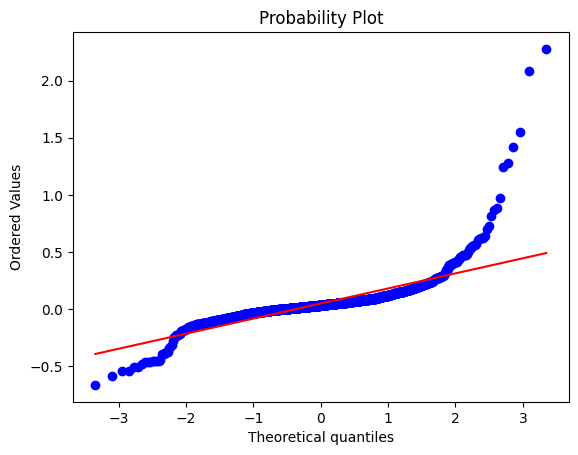

P-Value: 0.0
Reject H0: Client_Trade_Percentage is Normally distributed.


In [7]:
stats.probplot(df['Sales/Revenues'], dist="norm", plot=pylab)
pylab.show()
print("P-Value:", stats.normaltest(df['Sales/Revenues'])[1])
print("Reject H0: Client_Trade_Percentage is Normally distributed.")

Print Summary of Data

In [8]:
summary = df.describe()
print(summary)

       Sales/Revenues  Gross Margin       EBITDA  EBITDA Margin  \
count     1700.000000   1700.000000  1700.000000    1700.000000   
mean         0.050378      0.026007     0.068718       0.021074   
std          0.161910      0.273768     0.237365       0.189025   
min         -0.661715     -0.794722    -0.782254      -0.805153   
25%         -0.005693     -0.020028    -0.022640      -0.042771   
50%          0.034000      0.003403     0.049482       0.011134   
75%          0.083004      0.025595     0.124533       0.060566   
max          2.277229      3.202713     3.542425       4.141182   

       Net Income Before Extras   Total Debt     Net Debt      LT Debt  \
count               1700.000000  1700.000000  1700.000000  1700.000000   
mean                   0.123026     0.822405    -0.419810     1.255168   
std                   14.475689    13.317075    28.385702    16.224453   
min                 -289.000000    -0.903014  -493.305578    -0.921515   
25%                   -0.1

Plot Data

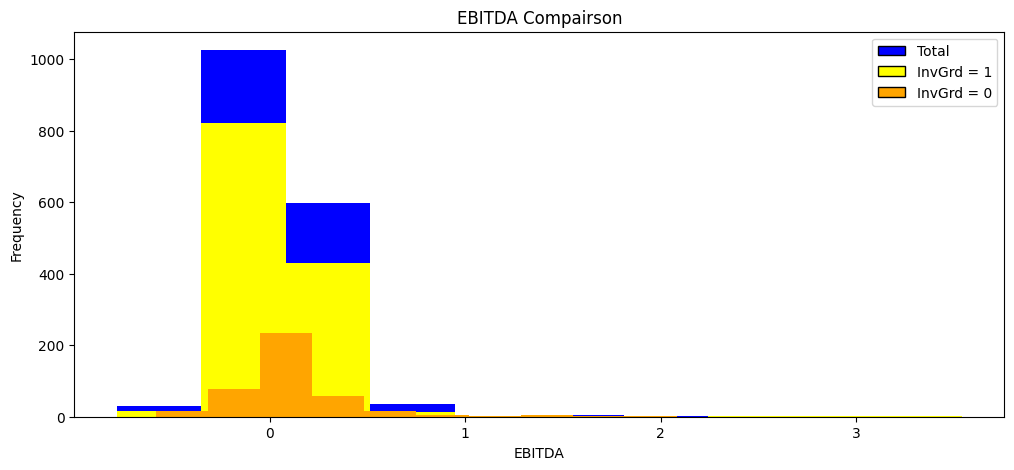

In [9]:
plt.figure(figsize=[12, 5])

plt.title('EBITDA Compairson')
plt.hist(df['EBITDA'],color='blue')
plt.hist(df_Inv['EBITDA'], color = 'yellow')
plt.hist(df_InvNo['EBITDA'], color = 'orange')
plt.ylabel('Frequency')
plt.xlabel('EBITDA')

colors = ["blue", "yellow", "orange"]
handles = [Rectangle((0,0),1,1,color=c,ec="k") for c in colors ]
labels= ["Total","InvGrd = 1", "InvGrd = 0"]
plt.legend(handles, labels)
plt.show()

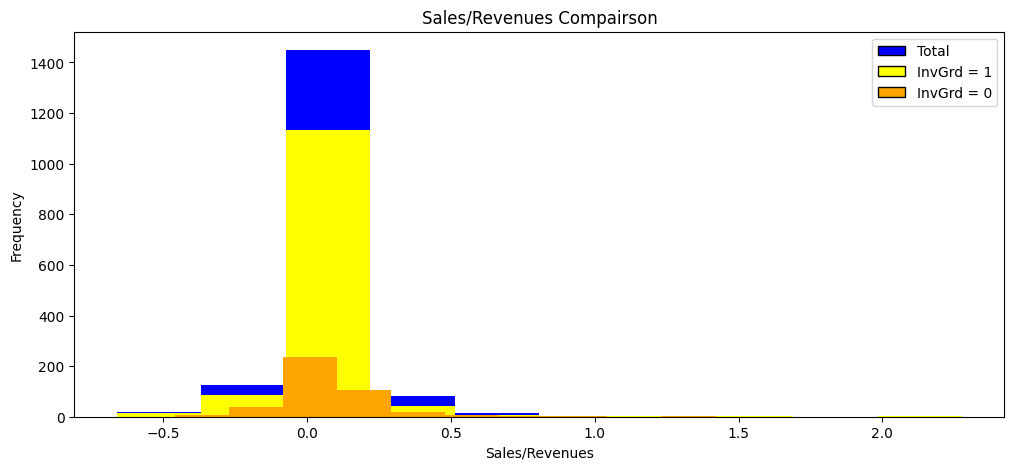

In [10]:
plt.figure(figsize=[12, 5])

plt.title('Sales/Revenues Compairson')
plt.hist(df['Sales/Revenues'],color='blue')
plt.hist(df_Inv['Sales/Revenues'], color = 'yellow')
plt.hist(df_InvNo['Sales/Revenues'], color = 'orange')
plt.ylabel('Frequency')
plt.xlabel('Sales/Revenues')

colors = ["blue", "yellow", "orange"]
handles = [Rectangle((0,0),1,1,color=c,ec="k") for c in colors ]
labels= ["Total","InvGrd = 1", "InvGrd = 0"]
plt.legend(handles, labels)
plt.show()

Cross Plotting Pairs of Attributes (Scatter Plot)

Text(0, 0.5, 'Sepal width')

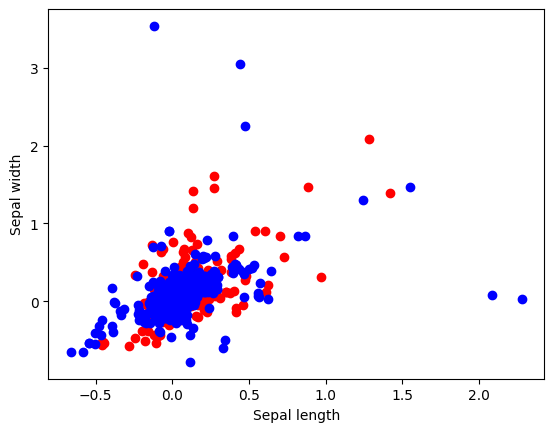

In [11]:
colors = ['red','blue']

y_binary = df['InvGrd']
y_multi = df['Rating']
X = df[['Sales/Revenues','EBITDA','InvGrd']]
for i in range(len(colors)):
    xs = X.loc[:, 'Sales/Revenues'][y_binary ==i]
    ys = X.loc[:, 'EBITDA'][y_binary ==i]
    plt.scatter(xs, ys, c=colors[i])
plt.xlabel("Sepal length")
plt.ylabel("Sepal width")

Text(0, 0.5, 'Sepal width')

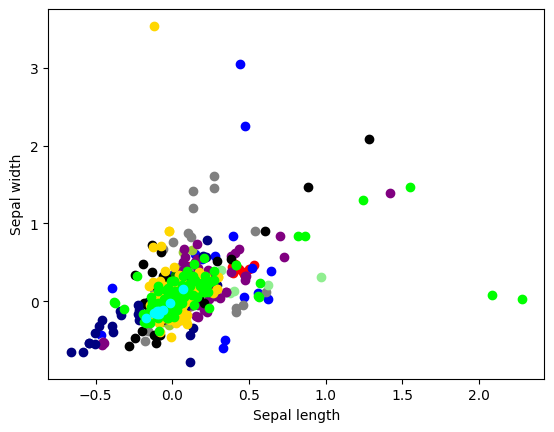

In [12]:
colors = ['red','blue','yellow','orange','green','lightskyblue', 'yellowgreen','gray',
          'lightgreen','pink','purple','black','navy','gold', 'lime', 'cyan' ]


X = df[['Sales/Revenues','EBITDA','Rating']]
list_rating = list(Ratings)

for i in range(len(colors)):
    xs = X.loc[:, 'Sales/Revenues'][y_multi== list_rating[i]]
    ys = X.loc[:, 'EBITDA'][y_multi ==list_rating[i]]
    plt.scatter(xs, ys, c=colors[i])
plt.xlabel("Sepal length")
plt.ylabel("Sepal width")


Correlation

In [13]:
df.corr()

,Sales/Revenues,Gross Margin,EBITDA,EBITDA Margin,Net Income Before Extras,Total Debt,Net Debt,LT Debt,ST Debt,Cash,...,CFO,Interest Coverage,Total Liquidity,Current Liquidity,Current Liabilities,EPS Before Extras,PE,ROA,ROE,InvGrd
Sales/Revenues,1.000000,-0.026318,0.500178,-0.124079,0.012024,0.068938,0.175741,0.048960,0.014987,-0.008088,...,0.034069,0.032716,0.035747,-0.081346,0.553807,0.034722,-0.014842,0.007251,-0.000206,-0.080836
Gross Margin,-0.026318,1.000000,0.114092,0.147886,-0.001061,-0.002665,0.004266,-0.003149,-0.005417,-0.024540,...,-0.055569,-0.002079,-0.011190,-0.022793,0.051386,0.000857,0.029146,-0.001583,0.000182,-0.066103
EBITDA,0.500178,0.114092,1.000000,0.757142,0.012565,0.008949,0.119251,-0.000665,0.004844,-0.030773,...,-0.041064,0.028118,-0.008799,-0.054680,0.207526,0.042191,0.040732,0.007913,-0.005701,-0.085951
EBITDA Margin,-0.124079,0.147886,0.757142,1.000000,0.003331,-0.039804,0.000336,-0.037009,-0.006310,-0.023997,...,-0.075326,0.008147,-0.033862,-0.000036,-0.119068,0.021589,0.071426,0.002072,-0.008328,-0.024112
Net Income Before Extras,0.012024,-0.001061,0.012565,0.003331,1.000000,-0.001065,0.000867,-0.001162,-0.000221,-0.006703,...,0.001832,0.002233,-0.001938,-0.008131,0.004226,0.506547,-0.003166,0.997349,0.782491,-0.027919
Total Debt,0.068938,-0.002665,0.008949,-0.039804,-0.001065,1.000000,-0.022209,0.833567,0.118240,-0.030002,...,0.000924,-0.016078,-0.000801,-0.031600,0.062364,-0.001424,-0.003652,-0.001406,0.000301,-0.090372
Net Debt,0.175741,0.004266,0.119251,0.000336,0.000867,-0.022209,1.000000,-0.021307,0.001191,0.007184,...,0.002762,-0.003566,0.000492,-0.003824,0.059139,0.001046,-0.000371,-0.000709,-0.001965,-0.042195
LT Debt,0.048960,-0.003149,-0.000665,-0.037009,-0.001162,0.833567,-0.021307,1.000000,0.092393,-0.030084,...,0.001270,-0.014810,-0.000532,-0.026573,0.023553,-0.001298,-0.003545,-0.001303,0.000712,-0.061665
ST Debt,0.014987,-0.005417,0.004844,-0.006310,-0.000221,0.118240,0.001191,0.092393,1.000000,-0.012802,...,0.002729,-0.007233,0.000503,-0.023235,0.105872,0.000275,-0.002704,-0.000339,-0.001022,-0.003028
Cash,-0.008088,-0.024540,-0.030773,-0.023997,-0.006703,-0.030002,0.007184,-0.030084,-0.012802,1.000000,...,0.019751,-0.023920,0.023993,0.973123,0.004712,-0.017470,0.034156,-0.006606,-0.000344,-0.088877


Correlation Visualization

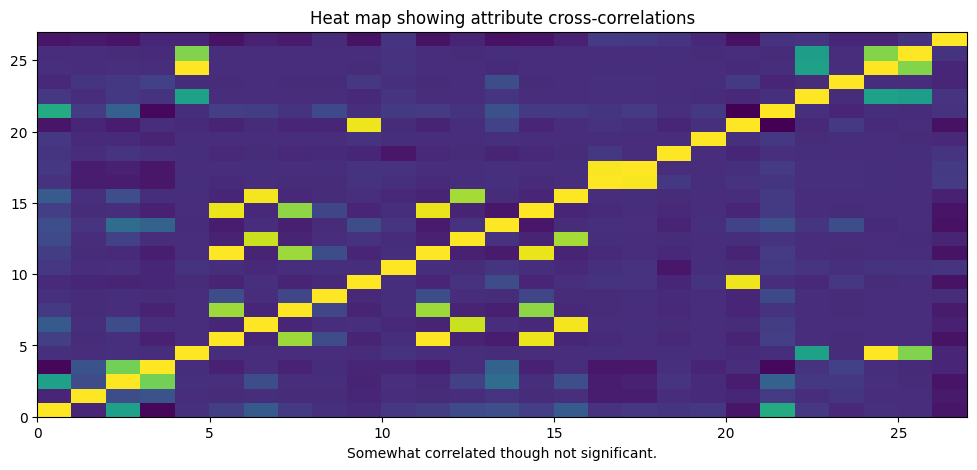

In [14]:
#calculate correlations between real-valued attributes
corMat = pd.DataFrame(df.corr())
#visualize correlations using heatmap
plt.figure(figsize=[12,5])
plt.title("Heat map showing attribute cross‐correlations")
plt.pcolor(corMat)
plt.xlabel('Somewhat correlated though not significant.')
plt.show()

## 2) Preprocessing, feature extraction, feature selection


Drop Missing Value

In [15]:
df = df.dropna()

Preprocessing the Data

In [16]:
encoder = LabelEncoder()
X = df.drop(['InvGrd','Rating'], axis = 1)

y_binary = df['InvGrd']
y_label = df['Rating']
y_multi = encoder.fit_transform(y_label)

scaler = preprocessing.StandardScaler().fit(X)
X_scaled = scaler.transform(X)

Variance Ratio

Explained Variance Ratio with all components:
 [3.43047199e-01 3.25324928e-01 1.20717674e-01 7.24409782e-02
 6.28795206e-02 1.75279579e-02 1.34937683e-02 9.49562533e-03
 8.50716279e-03 8.32593599e-03 7.69529261e-03 3.29035410e-03
 3.20490490e-03 1.70619518e-03 1.34038953e-03 8.30711631e-04
 6.59285613e-05 3.64523500e-05 2.28387916e-05 1.42339841e-05
 1.20727109e-05 8.64794299e-06 5.25124749e-06 3.85369188e-06
 1.97773212e-06 1.44521331e-07] 

Culmulative Variance Ratio with all components:
 [0.3430472  0.66837213 0.7890898  0.86153078 0.9244103  0.94193826
 0.95543203 0.96492765 0.97343481 0.98176075 0.98945604 0.9927464
 0.9959513  0.9976575  0.99899789 0.9998286  0.99989453 0.99993098
 0.99995382 0.99996805 0.99998012 0.99998877 0.99999402 0.99999788
 0.99999986 1.        ] 




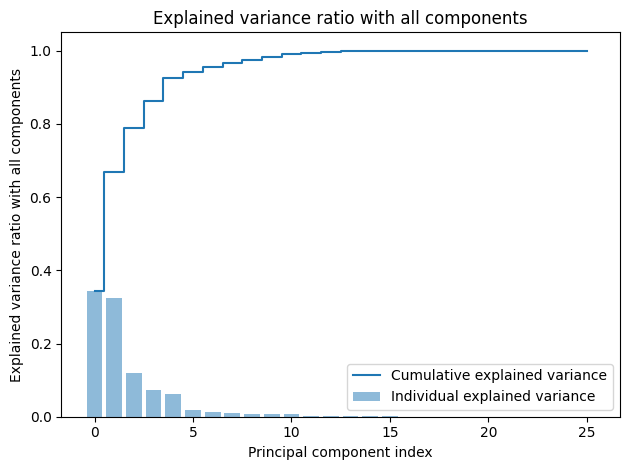

In [17]:
before = PCA(n_components=len(X.columns))
before.fit_transform(X)
print("Explained Variance Ratio with all components:\n", before.explained_variance_ratio_, "\n")
print("Culmulative Variance Ratio with all components:\n", before.explained_variance_ratio_.cumsum(), "\n\n")

plt.bar(range(0,len(before.explained_variance_ratio_)), before.explained_variance_ratio_, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(0,len(before.explained_variance_ratio_.cumsum())), before.explained_variance_ratio_.cumsum(), where='mid',label='Cumulative explained variance')

plt.title('Explained variance ratio with all components')
plt.ylabel('Explained variance ratio with all components')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

Explained Variance Ratio with 4 components:
 [0.3430472  0.32532493 0.12071767 0.07244098] 

Culmulative Variance Ratio with 4 components:
 [0.3430472  0.66837213 0.7890898  0.86153078]


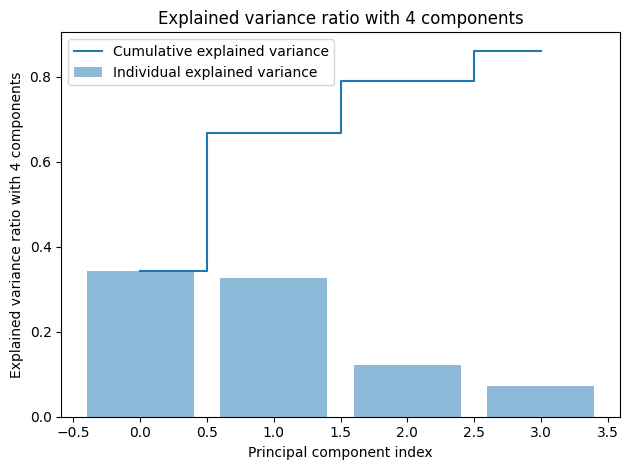

In [18]:
after = PCA(n_components=4)
X_pca = after.fit_transform(X)
print("Explained Variance Ratio with 4 components:\n",after.explained_variance_ratio_, "\n")
print("Culmulative Variance Ratio with 4 components:\n", after.explained_variance_ratio_.cumsum())

plt.bar(range(0,len(after.explained_variance_ratio_)), after.explained_variance_ratio_, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(0,len(after.explained_variance_ratio_.cumsum())), after.explained_variance_ratio_.cumsum(), where='mid',label='Cumulative explained variance')

plt.title('Explained variance ratio with 4 components')
plt.ylabel('Explained variance ratio with 4 components')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

## 3 + 4)  Model fitting and evaluation + Hyperparameter tuning
### Model: Binary Classification (Investment grade)

Model : SVM + Gridsearch (Hyperparameter tuning) w PCA

In [19]:
svc_param_grid = {
    'C': [0.1, 1],
    'kernel': ['linear']
}
svc = SVC()

svc_pca_grid_search = GridSearchCV(svc, svc_param_grid, cv=5)
svc_pca_grid_search.fit(X_pca, y_binary)

print("SVC best parameter :", svc_pca_grid_search.best_params_)
print("SVC best estimator :",svc_pca_grid_search.best_estimator_)
print("SVC best score: ", svc_pca_grid_search.best_score_)

SVC best parameter : {'C': 0.1, 'kernel': 'linear'}
SVC best estimator : SVC(C=0.1, kernel='linear')
SVC best score:  0.7594117647058823


Model : Decision Tree  + Gridsearch (Hyperparameter tuning) w PCA

In [20]:
dt_param_grid = {'max_depth': [2, 4, 6, 8, 10],
              'min_samples_split': [2, 4, 6, 8, 10],
              'min_samples_leaf': [1, 2, 3, 4, 5]}

dt = DecisionTreeClassifier()

dt_pca_grid_search = GridSearchCV(dt, dt_param_grid, cv=5)
dt_pca_grid_search.fit(X_pca, y_binary)

print("DT best parameter :", dt_pca_grid_search.best_params_)
print("DT best estimator :",dt_pca_grid_search.best_estimator_)
print("DT best score: ", dt_pca_grid_search.best_score_)

DT best parameter : {'max_depth': 4, 'min_samples_leaf': 1, 'min_samples_split': 2}
DT best estimator : DecisionTreeClassifier(max_depth=4)
DT best score:  0.7476470588235294


### Model: Multiclass Classification (Moody)
One rest model

Model : Logistic Regresssion on Scaled data + One rest w/ PCA 

In [21]:
lr_param_grid = {"C": [0.1, 1, 10, 100], 
              "penalty": ["l1", "l2"]}

lr = LogisticRegression(multi_class="ovr")

lr_grid_search = GridSearchCV(lr, lr_param_grid, cv=5)
lr_grid_search.fit(X_scaled, y_multi)

print("Multi-Class LR best parameter :", lr_grid_search.best_params_)
print("Multi-Class LR best estimator :",lr_grid_search.best_estimator_)
print("Multi-Class LR best score: ", lr_grid_search.best_score_)

Multi-Class LR best parameter : {'C': 0.1, 'penalty': 'l2'}
Multi-Class LR best estimator : LogisticRegression(C=0.1, multi_class='ovr')
Multi-Class LR best score:  0.16882352941176473


Model : Decision Tree  + OneRest w PCA

In [22]:
dt_one_rest_param_grid = {'estimator__max_depth': [2, 6, 10],
              'estimator__min_samples_split': [2, 6, 10],
              'estimator__min_samples_leaf': [1, 3, 5]}

dt_one_rest = OneVsRestClassifier(dt)
dt_one_rest_grid_search = GridSearchCV(dt_one_rest, dt_one_rest_param_grid, cv=5)
dt_one_rest_grid_search.fit(X, y_multi)

print("Multi-Class DT best parameter :", dt_one_rest_grid_search.best_params_)
print("Multi-Class DT best estimator :",dt_one_rest_grid_search.best_estimator_)
print("Multi-Class DT best score: ", dt_one_rest_grid_search.best_score_)

Multi-Class DT best parameter : {'estimator__max_depth': 10, 'estimator__min_samples_leaf': 3, 'estimator__min_samples_split': 2}
Multi-Class DT best estimator : OneVsRestClassifier(estimator=DecisionTreeClassifier(max_depth=10,
                                                     min_samples_leaf=3))
Multi-Class DT best score:  0.18294117647058825


Model : SVC + One v One w/ PCA

In [23]:
svc_one_rest_param_grid = {
    'estimator__C': [0.1, 1],
    'estimator__gamma': [1, 0.1, 0.01],
    'estimator__kernel': ['linear', 'rbf']
}

svc_one_rest = OneVsOneClassifier(SVC())
svc_one_rest_grid_search=GridSearchCV(svc_one_rest,svc_one_rest_param_grid, cv=5)
svc_one_rest_grid_search.fit(X_pca, y_multi)

print("Multi-Class SVC best parameter :", svc_one_rest_grid_search.best_params_)
print("Multi-Class SVC best estimator :",svc_one_rest_grid_search.best_estimator_)
print("Multi-Class SVC best score: ", svc_one_rest_grid_search.best_score_)

Multi-Class SVC best parameter : {'estimator__C': 0.1, 'estimator__gamma': 1, 'estimator__kernel': 'rbf'}
Multi-Class SVC best estimator : OneVsOneClassifier(estimator=SVC(C=0.1, gamma=1))
Multi-Class SVC best score:  0.20294117647058824


## 5) Ensembling

### Model: Binary Classification (Investment grade)

Model : Random Forest + Gridsearch (Hyperparameter tuning) w/ PCA

In [24]:
rf_param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
}
# create random forest classifier
rfc = RandomForestClassifier(random_state=1)

# rf_parameter tuning
rf_grid_search = GridSearchCV(estimator=rfc, param_grid=rf_param_grid, cv=5)
# fit model
rf_grid_search.fit(X, y_binary)

print("RF best parameter :", rf_grid_search.best_params_)
print("RF best estimator :",rf_grid_search.best_estimator_)
print("RF best score: ", rf_grid_search.best_score_)

RF best parameter : {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}
RF best estimator : RandomForestClassifier(max_depth=10, min_samples_split=5, random_state=1)
RF best score:  0.741764705882353


Model : Random Forest + Gridsearch (Hyperparameter tuning) w PCA

In [25]:
# rf_parameter tuning
rf_pca_grid_search = GridSearchCV(estimator=rfc, param_grid=rf_param_grid, cv=5)
# fit model
rf_pca_grid_search.fit(X_pca, y_binary)

print("RF + PCA best parameter :", rf_pca_grid_search.best_params_)
print("RF + PCA best estimator :",rf_pca_grid_search.best_estimator_)
print("RF + PCA best score: ", rf_pca_grid_search.best_score_)

RF + PCA best parameter : {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 50}
RF + PCA best estimator : RandomForestClassifier(max_depth=5, min_samples_split=5, n_estimators=50,
                       random_state=1)
RF + PCA best score:  0.7452941176470589


### Model: Multiclass Classification (Moody)

Model : Random Forest + One Rest w/ PCA

In [26]:
rf_one_rest_param_grid = {
    'estimator__n_estimators': [50, 100, 200],
    'estimator__max_depth': [2, 5, 10],
}

rf_one_rest = OneVsRestClassifier(rfc)
rf_one_rest_grid_search = GridSearchCV(rf_one_rest, rf_one_rest_param_grid, cv=5)
rf_one_rest_grid_search.fit(X, y_multi)

print("Multi-Class RF best parameter :", rf_one_rest_grid_search.best_params_)
print("Multi-Class RF best estimator :",rf_one_rest_grid_search.best_estimator_)
print("Multi-Class RF best score: ", rf_one_rest_grid_search.best_score_)

Multi-Class RF best parameter : {'estimator__max_depth': 5, 'estimator__n_estimators': 100}
Multi-Class RF best estimator : OneVsRestClassifier(estimator=RandomForestClassifier(max_depth=5,
                                                     random_state=1))
Multi-Class RF best score:  0.20941176470588233


Model : Random Forest + One Rest w PCA

In [27]:
rf_one_rest_pca_grid_search = GridSearchCV(rf_one_rest, rf_one_rest_param_grid, cv=5)
rf_one_rest_pca_grid_search.fit(X_pca, y_multi)

print("Multi-Class RF + PCA best parameter :", rf_one_rest_pca_grid_search.best_params_)
print("Multi-Class RF + PCA best estimator :",rf_one_rest_pca_grid_search.best_estimator_)
print("Multi-Class RF + PCA best score: ", rf_one_rest_pca_grid_search.best_score_)

Multi-Class RF + PCA best parameter : {'estimator__max_depth': 2, 'estimator__n_estimators': 50}
Multi-Class RF + PCA best estimator : OneVsRestClassifier(estimator=RandomForestClassifier(max_depth=2,
                                                     n_estimators=50,
                                                     random_state=1))
Multi-Class RF + PCA best score:  0.18176470588235294


## 6) Conclusions

**Binary Classification** 

When it comes to binary classification, the Support Vector Machine (SVM) method has shown to be highly effective, achieving an accuracy rate of 76% using 5-fold cross-validation. Remarkably, this even outperformed ensemble models such as Random Forest. The second-best model was the decision tree. Based on these results, we can conclude that non-ensemble models are advantageous in binary classification might cause by low risk of overfitting.

**Multi-Class Classification**

For multi-class classification, I opted to use the One v One + SVM model due to its faster computation time compared to the One v Rest method. However, the Random Forest + One v Rest model outperformed it by 21% in terms of accuracy. In this scenario, an ensemble model proved to be the superior choice.
